# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

In [1]:
import pandas as pd
import numpy as np
import math
import json
%matplotlib inline
#myhelper.py
# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

In [2]:
portfolio

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5
5,"[web, email, mobile, social]",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3
6,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2
7,"[email, mobile, social]",0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0
8,"[web, email, mobile, social]",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5
9,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2


In [3]:
#let's create dummy variables for the portfolio channels
#we'll also do the same for the offer types
"""
creating dummy variables for channels and offer types

input: portfolio df

output: updated portfolio df

"""
def portfolio_dummies(portfolio):
    
    updated_portfolio = portfolio.copy()
    
    updated_portfolio['channels'] = updated_portfolio['channels'].astype(str)

    

    def replaceChars(df):
        symbols = ["[", "]", "'", " "]
        for symbol in symbols:
                df = df.str.replace(symbol, "")
        return  df
    
    #run above function on the channels column
    updated_portfolio.channels = replaceChars(updated_portfolio.channels)

    all_channels = []

    for x in updated_portfolio.channels:
        all_channels.extend(x.split(','))

    channels = pd.unique(all_channels)

    zero_matrix = np.zeros((len(portfolio), len(channels)))

    dummies = pd.DataFrame(zero_matrix, columns=channels).astype(np.uint8)

    for i, chan in enumerate(updated_portfolio.channels):
        indices = dummies.columns.get_indexer(chan.split(','))
        dummies.iloc[i, indices] = 1
        
    #update with new dummies for channels
    updated_portfolio = updated_portfolio.join(dummies)
    
    #now to get dummies for the offer_type
    offer_dummies = pd.get_dummies(updated_portfolio['offer_type'])
    updated_portfolio = updated_portfolio.join(offer_dummies)
    
    #drop extra columns
    updated_portfolio.drop(['channels', 'offer_type'], axis=1, inplace=True)
    
    #let's convert duration to hours
    updated_portfolio['duration'] = updated_portfolio['duration']*24
    
    return updated_portfolio
    

In [4]:
updated_portfolio = portfolio_dummies(portfolio)
updated_portfolio

,difficulty,duration,id,reward,email,mobile,social,web,bogo,discount,informational
0,10,168,ae264e3637204a6fb9bb56bc8210ddfd,10,1,1,1,0,1,0,0
1,10,120,4d5c57ea9a6940dd891ad53e9dbe8da0,10,1,1,1,1,1,0,0
2,0,96,3f207df678b143eea3cee63160fa8bed,0,1,1,0,1,0,0,1
3,5,168,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,1,1,0,1,1,0,0
4,20,240,0b1e1539f2cc45b7b9fa7c272da2e1d7,5,1,0,0,1,0,1,0
5,7,168,2298d6c36e964ae4a3e7e9706d1fb8c2,3,1,1,1,1,0,1,0
6,10,240,fafdcd668e3743c1bb461111dcafc2a4,2,1,1,1,1,0,1,0
7,0,72,5a8bc65990b245e5a138643cd4eb9837,0,1,1,1,0,0,0,1
8,5,120,f19421c1d4aa40978ebb69ca19b0e20d,5,1,1,1,1,1,0,0
9,10,168,2906b810c7d4411798c6938adc9daaa5,2,1,1,0,1,0,1,0


In [5]:
#the next data set is profile
profile

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN
5,68,20180426,M,e2127556f4f64592b11af22de27a7932,70000.0
6,118,20170925,None,8ec6ce2a7e7949b1bf142def7d0e0586,NaN
7,118,20171002,None,68617ca6246f4fbc85e91a2a49552598,NaN
8,65,20180209,M,389bc3fa690240e798340f5a15918d5c,53000.0
9,118,20161122,None,8974fc5686fe429db53ddde067b88302,NaN


In [6]:
profile.describe()

,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


In [7]:
profile[profile['age']==118].count()

age                 2175
became_member_on    2175
gender                 0
id                  2175
income                 0
dtype: int64

In [8]:
#that's fascinating. For every line where age is 118, it appears gender and income are missing
#this indicates users must not have opted in to provide this infromation
#It also indicates 118 is a palceholder value for missing age
profile['became_member_on'].max()

20180726

In [9]:
transcript['time'].max()

714

In [10]:
import datetime

"""
We're going to clean and edit the profile dataframe and create a function to do so

input: profile df

output: cleaned profile df
"""
def update_profile(profile):
    

    #dealing with the missing ages right away
    updated_profile = profile.copy()
    updated_profile.age.loc[profile.age == 118] = np.nan  
    
    #let's also calculate the number of days users have had the app
    #however, I'm going to use an end date of Jan 1 2020 or 20200101
    d_end = datetime.date(2020,1,1)
    

    updated_profile['days_as_member'] = (d_end - pd.to_datetime(updated_profile['became_member_on'], format='%Y%m%d').dt.date).dt.days
    
    
    return updated_profile

In [11]:
updated_profile = update_profile(profile)
updated_profile

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,age,became_member_on,gender,id,income,days_as_member
0,NaN,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN,1053
1,55.0,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0,900
2,NaN,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN,538
3,75.0,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,967
4,NaN,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN,880
5,68.0,20180426,M,e2127556f4f64592b11af22de27a7932,70000.0,615
6,NaN,20170925,None,8ec6ce2a7e7949b1bf142def7d0e0586,NaN,828
7,NaN,20171002,None,68617ca6246f4fbc85e91a2a49552598,NaN,821
8,65.0,20180209,M,389bc3fa690240e798340f5a15918d5c,53000.0,691
9,NaN,20161122,None,8974fc5686fe429db53ddde067b88302,NaN,1135


In [12]:
updated_profile['age'].isna().sum()
#due to the sheer number of missing values, we'll keep them for now

2175

In [13]:
updated_profile.describe()

,age,became_member_on,income,days_as_member
count,14825.000000,1.700000e+04,14825.000000,17000.000000
mean,54.393524,2.016703e+07,65404.991568,1041.449882
std,17.383705,1.167750e+04,21598.299410,411.223904
min,18.000000,2.013073e+07,30000.000000,524.000000
25%,42.000000,2.016053e+07,49000.000000,732.000000
50%,55.000000,2.017080e+07,64000.000000,882.000000
75%,66.000000,2.017123e+07,80000.000000,1315.000000
max,101.000000,2.018073e+07,120000.000000,2347.000000


In [14]:
#anything interesting in our profile table?
#let's look for any noticeable features in customer age, income and how long they've been a member
import matplotlib.pyplot as plt


def visual(df, col1,col2, col3):    
    # Display Histogram of Customer Age
    num = df[col1].nunique()
    colName = str(col1)
    plot1 = df[col1].plot(kind='hist', bins=num, title=colName)
    plot1.set_xlabel(colName)
       
    # Display Histogram of the days being member
    plt.figure()
    num2 = df[col2].nunique()
    colName2 = str(col2)
    plot2 = df[col2].plot(kind='hist', bins=num2, title=colName2)
    plot2.set_xlabel(colName2)
    
    # Display Histogram of User Income
    plt.figure()
    num3 = df[col3].nunique()
    colName3 = str(col3)
    plot3 = df[col3].plot(kind='hist', bins=num3, title=colName3)
    plot3.set_xlabel(colName3)
    
    return plot1, plot2, plot3

(<matplotlib.axes._subplots.AxesSubplot at 0x7f3d2c5d9240>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3d2c4d39b0>)

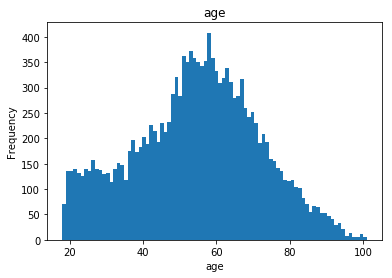

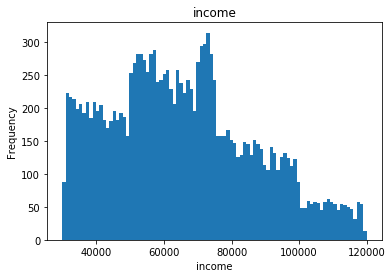

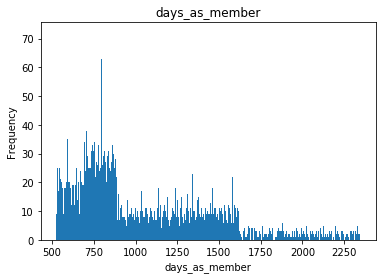

In [15]:
visual(updated_profile, 'age', 'income', 'days_as_member')

In [16]:
#we'll come back to the profile table
#let's move to the transcript table for now
transcript

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}
5,offer received,389bc3fa690240e798340f5a15918d5c,0,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'}
6,offer received,c4863c7985cf408faee930f111475da3,0,{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'}
7,offer received,2eeac8d8feae4a8cad5a6af0499a211d,0,{'offer id': '3f207df678b143eea3cee63160fa8bed'}
8,offer received,aa4862eba776480b8bb9c68455b8c2e1,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
9,offer received,31dda685af34476cad5bc968bdb01c53,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}


In [17]:
transcript.describe()

,time
count,306534.000000
mean,366.382940
std,200.326314
min,0.000000
25%,186.000000
50%,408.000000
75%,528.000000
max,714.000000


In [18]:
transcript.event.value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

In [19]:
transcript.value[70000]

{'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2', 'reward': 3}

In [20]:
#initial updates to the transcript dataframe
from pandas.io.json import json_normalize
"""
We're going to make some initial changes to the transcript dataframe.
We'll make dummy variables out of the event column
We'll also add an offer id column
We'll also create a new column for the amount when transactions are completed
Lastly, we'll make another column for rewards when offers are completed

Input: transcript df, portfolio df

Output: updated_transcript df 

"""

def update_transcript(transcript):
    
    #create the updated df
    updated_transcript = transcript.copy()
    
    #add an index column
    updated_transcript['event_index'] = range(1, len(updated_transcript) + 1)
    
    #create dummies for the event column
    event_dummies = pd.get_dummies(updated_transcript['event'])
    updated_transcript = updated_transcript.join(event_dummies)
    
    #let's create our new offer id, reward, and amount columns
    df_newcols = json_normalize(updated_transcript['value'])
    
    df_newcols["offerid"] = df_newcols["offer_id"].fillna('') + df_newcols["offer id"].fillna('')
    updated_transcript = updated_transcript.join(df_newcols)
    
            
    #drop the value, offer_id, offer id columns
    updated_transcript.drop(['value', 'event', 'offer id', 'offer_id'], axis=1, inplace = True)
    
    #replace empty string values with NaN
    updated_transcript['offerid'].replace(r'^\s*$', np.nan, regex=True, inplace = True)

    return updated_transcript

    
    

In [21]:
#let's test it on our transcript table
updated_transcript = update_transcript(transcript)
updated_transcript

,person,time,event_index,offer completed,offer received,offer viewed,transaction,amount,reward,offerid
0,78afa995795e4d85b5d9ceeca43f5fef,0,1,0,1,0,0,NaN,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,a03223e636434f42ac4c3df47e8bac43,0,2,0,1,0,0,NaN,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,e2127556f4f64592b11af22de27a7932,0,3,0,1,0,0,NaN,NaN,2906b810c7d4411798c6938adc9daaa5
3,8ec6ce2a7e7949b1bf142def7d0e0586,0,4,0,1,0,0,NaN,NaN,fafdcd668e3743c1bb461111dcafc2a4
4,68617ca6246f4fbc85e91a2a49552598,0,5,0,1,0,0,NaN,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0
5,389bc3fa690240e798340f5a15918d5c,0,6,0,1,0,0,NaN,NaN,f19421c1d4aa40978ebb69ca19b0e20d
6,c4863c7985cf408faee930f111475da3,0,7,0,1,0,0,NaN,NaN,2298d6c36e964ae4a3e7e9706d1fb8c2
7,2eeac8d8feae4a8cad5a6af0499a211d,0,8,0,1,0,0,NaN,NaN,3f207df678b143eea3cee63160fa8bed
8,aa4862eba776480b8bb9c68455b8c2e1,0,9,0,1,0,0,NaN,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7
9,31dda685af34476cad5bc968bdb01c53,0,10,0,1,0,0,NaN,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [22]:
#let's poke around our new transcript df
print(updated_transcript.person.nunique())
#everyone from the profile df was sent an offer
print(updated_transcript.offerid.unique())

17000
['9b98b8c7a33c4b65b9aebfe6a799e6d9' '0b1e1539f2cc45b7b9fa7c272da2e1d7'
 '2906b810c7d4411798c6938adc9daaa5' 'fafdcd668e3743c1bb461111dcafc2a4'
 '4d5c57ea9a6940dd891ad53e9dbe8da0' 'f19421c1d4aa40978ebb69ca19b0e20d'
 '2298d6c36e964ae4a3e7e9706d1fb8c2' '3f207df678b143eea3cee63160fa8bed'
 'ae264e3637204a6fb9bb56bc8210ddfd' '5a8bc65990b245e5a138643cd4eb9837' nan]


In [23]:
#great, now we've done initial cleaning on the three datasets
updated_transcript.describe()

,time,event_index,offer completed,offer received,offer viewed,transaction,amount,reward
count,306534.000000,306534.000000,306534.000000,306534.000000,306534.000000,306534.000000,138953.000000,33579.000000
mean,366.382940,153267.500000,0.109544,0.248837,0.188315,0.453304,12.777356,4.904137
std,200.326314,88488.888045,0.312321,0.432340,0.390964,0.497815,30.250529,2.886647
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.050000,2.000000
25%,186.000000,76634.250000,0.000000,0.000000,0.000000,0.000000,2.780000,2.000000
50%,408.000000,153267.500000,0.000000,0.000000,0.000000,0.000000,8.890000,5.000000
75%,528.000000,229900.750000,0.000000,0.000000,0.000000,1.000000,18.070000,5.000000
max,714.000000,306534.000000,1.000000,1.000000,1.000000,1.000000,1062.280000,10.000000


(<matplotlib.axes._subplots.AxesSubplot at 0x7f3d2c346ac8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3d266b5780>)

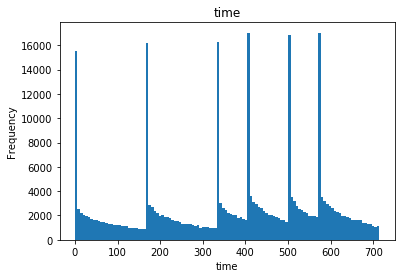

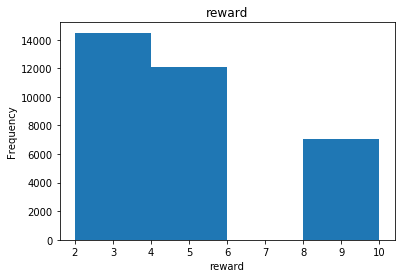

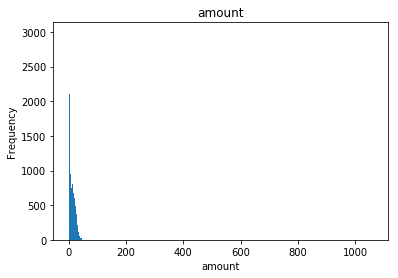

In [24]:
#let's explore the table using some plots
visual(updated_transcript, 'time', 'reward', 'amount')

(<matplotlib.axes._subplots.AxesSubplot at 0x7f3d26677c88>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3d260b4160>)

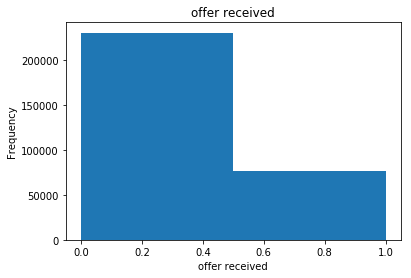

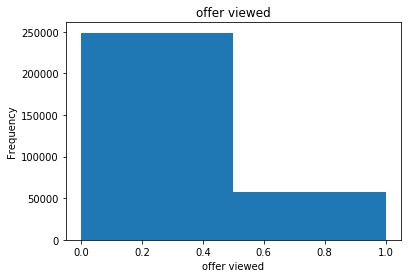

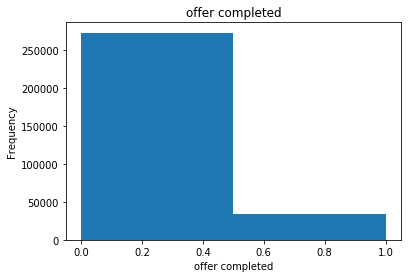

In [25]:
visual(updated_transcript, 'offer received', 'offer viewed', 'offer completed')

In [26]:
#let's first look at some stats with our offers and willingness of people to view and act upon them
offer_groupby = updated_transcript.groupby('offerid')
offer_groupby.describe()

amount                               \
                                  count mean std min 25% 50% 75% max   
offerid                                                                
0b1e1539f2cc45b7b9fa7c272da2e1d7    0.0  NaN NaN NaN NaN NaN NaN NaN   
2298d6c36e964ae4a3e7e9706d1fb8c2    0.0  NaN NaN NaN NaN NaN NaN NaN   
2906b810c7d4411798c6938adc9daaa5    0.0  NaN NaN NaN NaN NaN NaN NaN   
3f207df678b143eea3cee63160fa8bed    0.0  NaN NaN NaN NaN NaN NaN NaN   
4d5c57ea9a6940dd891ad53e9dbe8da0    0.0  NaN NaN NaN NaN NaN NaN NaN   
5a8bc65990b245e5a138643cd4eb9837    0.0  NaN NaN NaN NaN NaN NaN NaN   
9b98b8c7a33c4b65b9aebfe6a799e6d9    0.0  NaN NaN NaN NaN NaN NaN NaN   
ae264e3637204a6fb9bb56bc8210ddfd    0.0  NaN NaN NaN NaN NaN NaN NaN   
f19421c1d4aa40978ebb69ca19b0e20d    0.0  NaN NaN NaN NaN NaN NaN NaN   
fafdcd668e3743c1bb461111dcafc2a4    0.0  NaN NaN NaN NaN NaN NaN NaN   

                                 event_index                ...    time  \
                                       count           mean ...     75%   
offerid                                                     ...           
0b1e1539f2cc45b7b9fa7c272da2e1d7     13751.0  149949.427896 ...   516.0   
2298d6c36e964ae4a3e7e9706d1fb8c2     20139.0  150149.859675 ...   516.0   
2906b810c7d4411798c6938adc9daaa5     15767.0  148459.807383 ...   510.0   
3f207df678b143eea3cee63160fa8bed     11761.0  140070.003571 ...   504.0   
4d5c57ea9a6940dd891ad53e9dbe8da0     18222.0  146464.914554 ...   504.0   
5a8bc65990b245e5a138643cd4eb9837     14305.0  141762.497518 ...   504.0   
9b98b8c7a33c4b65b9aebfe6a799e6d9     16202.0  149875.811875 ...   516.0   
ae264e3637204a6fb9bb56bc8210ddfd     18062.0  146391.477522 ...   510.0   
f19421c1d4aa40978ebb69ca19b0e20d     19131.0  146367.768961 ...   510.0   
fafdcd668e3743c1bb461111dcafc2a4     20241.0  148560.322958 ...   516.0   

                                        transaction                           \
                                    max       count mean  std  min  25%  50%   
offerid                                                                        
0b1e1539f2cc45b7b9fa7c272da2e1d7  714.0     13751.0  0.0  0.0  0.0  0.0  0.0   
2298d6c36e964ae4a3e7e9706d1fb8c2  714.0     20139.0  0.0  0.0  0.0  0.0  0.0   
2906b810c7d4411798c6938adc9daaa5  714.0     15767.0  0.0  0.0  0.0  0.0  0.0   
3f207df678b143eea3cee63160fa8bed  714.0     11761.0  0.0  0.0  0.0  0.0  0.0   
4d5c57ea9a6940dd891ad53e9dbe8da0  714.0     18222.0  0.0  0.0  0.0  0.0  0.0   
5a8bc65990b245e5a138643cd4eb9837  714.0     14305.0  0.0  0.0  0.0  0.0  0.0   
9b98b8c7a33c4b65b9aebfe6a799e6d9  714.0     16202.0  0.0  0.0  0.0  0.0  0.0   
ae264e3637204a6fb9bb56bc8210ddfd  714.0     18062.0  0.0  0.0  0.0  0.0  0.0   
f19421c1d4aa40978ebb69ca19b0e20d  714.0     19131.0  0.0  0.0  0.0  0.0  0.0   
fafdcd668e3743c1bb461111dcafc2a4  714.0     20241.0  0.0  0.0  0.0  0.0  0.0   

                                            
                                  75%  max  
offerid                                     
0b1e1539f2cc45b7b9fa7c272da2e1d7  0.0  0.0  
2298d6c36e964ae4a3e7e9706d1fb8c2  0.0  0.0  
2906b810c7d4411798c6938adc9daaa5  0.0  0.0  
3f207df678b143eea3cee63160fa8bed  0.0  0.0  
4d5c57ea9a6940dd891ad53e9dbe8da0  0.0  0.0  
5a8bc65990b245e5a138643cd4eb9837  0.0  0.0  
9b98b8c7a33c4b65b9aebfe6a799e6d9  0.0  0.0  
ae264e3637204a6fb9bb56bc8210ddfd  0.0  0.0  
f19421c1d4aa40978ebb69ca19b0e20d  0.0  0.0  
fafdcd668e3743c1bb461111dcafc2a4  0.0  0.0  

[10 rows x 64 columns]

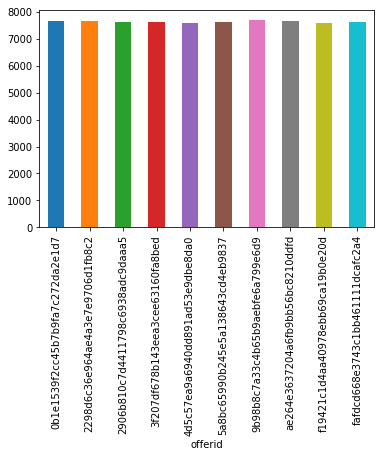

In [27]:
updated_transcript.groupby(['offerid'])['offer received'].sum().plot.bar()

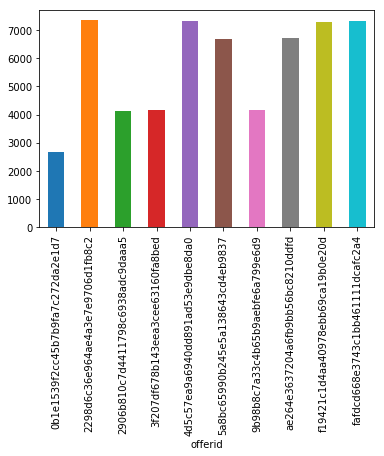

In [28]:
updated_transcript.groupby(['offerid'])['offer viewed'].sum().plot.bar()

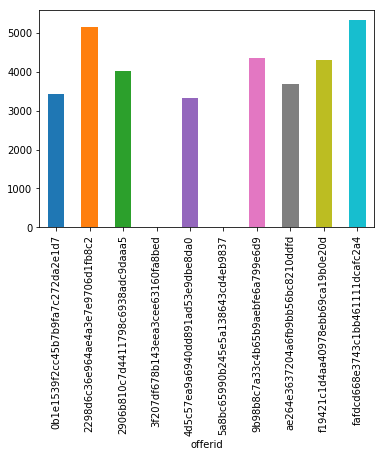

In [29]:
updated_transcript.groupby(['offerid'])['offer completed'].sum().plot.bar()

It appears as though informational offers with 0 reward were not completed at all. This could be due to a variety of factors. One: there was no "offer" or reward to complete. It's just information. Two, there's not an accurate way captured in the data to show if someone acted upon an informational offer (specifics about the offer is not provided). We'll drop these from our data down the line but may want to keep them for now just to see how many people viewed them by geender etc (anything interesting which might pop up).

In [30]:
updated_portfolio

,difficulty,duration,id,reward,email,mobile,social,web,bogo,discount,informational
0,10,168,ae264e3637204a6fb9bb56bc8210ddfd,10,1,1,1,0,1,0,0
1,10,120,4d5c57ea9a6940dd891ad53e9dbe8da0,10,1,1,1,1,1,0,0
2,0,96,3f207df678b143eea3cee63160fa8bed,0,1,1,0,1,0,0,1
3,5,168,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,1,1,0,1,1,0,0
4,20,240,0b1e1539f2cc45b7b9fa7c272da2e1d7,5,1,0,0,1,0,1,0
5,7,168,2298d6c36e964ae4a3e7e9706d1fb8c2,3,1,1,1,1,0,1,0
6,10,240,fafdcd668e3743c1bb461111dcafc2a4,2,1,1,1,1,0,1,0
7,0,72,5a8bc65990b245e5a138643cd4eb9837,0,1,1,1,0,0,0,1
8,5,120,f19421c1d4aa40978ebb69ca19b0e20d,5,1,1,1,1,1,0,0
9,10,168,2906b810c7d4411798c6938adc9daaa5,2,1,1,0,1,0,1,0


In [31]:
updated_profile

,age,became_member_on,gender,id,income,days_as_member
0,NaN,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN,1053
1,55.0,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0,900
2,NaN,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN,538
3,75.0,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,967
4,NaN,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN,880
5,68.0,20180426,M,e2127556f4f64592b11af22de27a7932,70000.0,615
6,NaN,20170925,None,8ec6ce2a7e7949b1bf142def7d0e0586,NaN,828
7,NaN,20171002,None,68617ca6246f4fbc85e91a2a49552598,NaN,821
8,65.0,20180209,M,389bc3fa690240e798340f5a15918d5c,53000.0,691
9,NaN,20161122,None,8974fc5686fe429db53ddde067b88302,NaN,1135


In [32]:
updated_transcript

,person,time,event_index,offer completed,offer received,offer viewed,transaction,amount,reward,offerid
0,78afa995795e4d85b5d9ceeca43f5fef,0,1,0,1,0,0,NaN,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,a03223e636434f42ac4c3df47e8bac43,0,2,0,1,0,0,NaN,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,e2127556f4f64592b11af22de27a7932,0,3,0,1,0,0,NaN,NaN,2906b810c7d4411798c6938adc9daaa5
3,8ec6ce2a7e7949b1bf142def7d0e0586,0,4,0,1,0,0,NaN,NaN,fafdcd668e3743c1bb461111dcafc2a4
4,68617ca6246f4fbc85e91a2a49552598,0,5,0,1,0,0,NaN,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0
5,389bc3fa690240e798340f5a15918d5c,0,6,0,1,0,0,NaN,NaN,f19421c1d4aa40978ebb69ca19b0e20d
6,c4863c7985cf408faee930f111475da3,0,7,0,1,0,0,NaN,NaN,2298d6c36e964ae4a3e7e9706d1fb8c2
7,2eeac8d8feae4a8cad5a6af0499a211d,0,8,0,1,0,0,NaN,NaN,3f207df678b143eea3cee63160fa8bed
8,aa4862eba776480b8bb9c68455b8c2e1,0,9,0,1,0,0,NaN,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7
9,31dda685af34476cad5bc968bdb01c53,0,10,0,1,0,0,NaN,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [33]:
updated_transcript[updated_transcript['offer received']== 1].count()

person             76277
time               76277
event_index        76277
offer completed    76277
offer received     76277
offer viewed       76277
transaction        76277
amount                 0
reward                 0
offerid            76277
dtype: int64

In [34]:
updated_transcript.dtypes

person              object
time                 int64
event_index          int64
offer completed      uint8
offer received       uint8
offer viewed         uint8
transaction          uint8
amount             float64
reward             float64
offerid             object
dtype: object

In [35]:
#interesting preview we've got. While each offer was sent out evenly,
#there was clearly some which users preferred. 
#Now let's construct our new combined data frame
"""
input: 3 updated_ dataframes
output: new dataframe ready to be split into train and test
"""
def newdf(updated_portfolio, updated_profile, updated_transcript):
    
    new_portfolio = updated_portfolio.copy()
    new_profile = updated_profile.copy()
    new_transcript = updated_transcript.copy()
    
    
    #getting the appropriate rows from our transcript df
    new_transcript = new_transcript[(new_transcript['offer received'] == 1) | (new_transcript['offer viewed'] \
                                                          == 1) |(new_transcript['offer completed'] == 1)]
    
    #create the new column by which we will aggregregate a sum
    new_transcript['personoffer'] = new_transcript["person"].fillna('') + "," + \
                                                          new_transcript["offerid"].fillna('')
    
    grouped_df = new_transcript[['personoffer', 'offer completed', 'offer viewed', 'offer received']] 
    #create the grouped table
    grouped_df.groupby('personoffer', as_index=False).sum()

    
    #splitting for the new df
    # new data frame with split value columns 
    grouped_df[['personid','offerid']] = grouped_df.personoffer.str.split(",",expand=True)
    
    #let's join our other tables; default is inner join, first the portfolio table
    new_df = pd.merge(grouped_df, new_portfolio, left_on='offerid', right_on='id', how='left')
    new_df = pd.merge(new_df, new_profile, left_on='personid', right_on='id', how='left')

    new_df.drop(['personoffer', 'id_x', 'id_y', 'became_member_on'], axis=1, inplace = True)
    

    return new_df



In [36]:
new_df = newdf(updated_portfolio, updated_profile, updated_transcript)
new_df

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,offer completed,offer viewed,offer received,personid,offerid,difficulty,duration,reward,email,mobile,social,web,bogo,discount,informational,age,gender,income,days_as_member
0,0,0,1,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,168,5,1,1,0,1,1,0,0,75.0,F,100000.0,967
1,0,0,1,a03223e636434f42ac4c3df47e8bac43,0b1e1539f2cc45b7b9fa7c272da2e1d7,20,240,5,1,0,0,1,0,1,0,NaN,None,NaN,880
2,0,0,1,e2127556f4f64592b11af22de27a7932,2906b810c7d4411798c6938adc9daaa5,10,168,2,1,1,0,1,0,1,0,68.0,M,70000.0,615
3,0,0,1,8ec6ce2a7e7949b1bf142def7d0e0586,fafdcd668e3743c1bb461111dcafc2a4,10,240,2,1,1,1,1,0,1,0,NaN,None,NaN,828
4,0,0,1,68617ca6246f4fbc85e91a2a49552598,4d5c57ea9a6940dd891ad53e9dbe8da0,10,120,10,1,1,1,1,1,0,0,NaN,None,NaN,821
5,0,0,1,389bc3fa690240e798340f5a15918d5c,f19421c1d4aa40978ebb69ca19b0e20d,5,120,5,1,1,1,1,1,0,0,65.0,M,53000.0,691
6,0,0,1,c4863c7985cf408faee930f111475da3,2298d6c36e964ae4a3e7e9706d1fb8c2,7,168,3,1,1,1,1,0,1,0,NaN,None,NaN,860
7,0,0,1,2eeac8d8feae4a8cad5a6af0499a211d,3f207df678b143eea3cee63160fa8bed,0,96,0,1,1,0,1,0,0,1,58.0,M,51000.0,781
8,0,0,1,aa4862eba776480b8bb9c68455b8c2e1,0b1e1539f2cc45b7b9fa7c272da2e1d7,20,240,5,1,0,0,1,0,1,0,61.0,F,57000.0,842
9,0,0,1,31dda685af34476cad5bc968bdb01c53,0b1e1539f2cc45b7b9fa7c272da2e1d7,20,240,5,1,0,0,1,0,1,0,62.0,F,71000.0,1420


We'll split the new_df to create our understanding (train + validation) and test sets
and use understanding for some initial data exploration to develop baseline assumptions and benchmark hypothesis.
Then we'll split understanding and to get it ready for data exploration


In [37]:
#let's split into understanding and test dataframes
#we'll use the understanding dataframe for our heuristics and assumptions
understanding_df = new_df.sample(frac=0.85,random_state=123)
test_df=new_df.drop(understanding_df.index)

In [38]:
understanding_df

,offer completed,offer viewed,offer received,personid,offerid,difficulty,duration,reward,email,mobile,social,web,bogo,discount,informational,age,gender,income,days_as_member
53952,0,1,0,e4c312e8e2944fbc8204d18a0bc952d0,2906b810c7d4411798c6938adc9daaa5,10,168,2,1,1,0,1,0,1,0,61.0,M,94000.0,1466
134617,1,0,0,1d3acfc18ee04b70b51e5fa1826c9621,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,168,5,1,1,0,1,1,0,0,53.0,F,117000.0,1310
14281,0,1,0,68a537d08baa4a7f89b0bc4c246453f4,fafdcd668e3743c1bb461111dcafc2a4,10,240,2,1,1,1,1,0,1,0,70.0,M,59000.0,1222
42484,1,0,0,3446d272fcef4bd28e88300d1163840a,0b1e1539f2cc45b7b9fa7c272da2e1d7,20,240,5,1,0,0,1,0,1,0,45.0,M,74000.0,1527
126839,0,1,0,c014dcf29fb54b12a509e0fa0506520c,5a8bc65990b245e5a138643cd4eb9837,0,72,0,1,1,1,0,0,0,1,58.0,M,40000.0,619
10833,0,0,1,aa0ec945932e4a3681f56367457430e2,f19421c1d4aa40978ebb69ca19b0e20d,5,120,5,1,1,1,1,1,0,0,NaN,None,NaN,608
64108,0,0,1,c1cd465847e2488482d863ff5ff15a20,fafdcd668e3743c1bb461111dcafc2a4,10,240,2,1,1,1,1,0,1,0,56.0,M,37000.0,618
108979,0,1,0,e7b245f7399746faac8b4184d500a21a,2906b810c7d4411798c6938adc9daaa5,10,168,2,1,1,0,1,0,1,0,53.0,M,64000.0,686
123048,0,1,0,87ab31c624964083bb6a4e3a64fd7c55,2298d6c36e964ae4a3e7e9706d1fb8c2,7,168,3,1,1,1,1,0,1,0,51.0,F,43000.0,694
102338,0,1,0,8fda24811f1f4867afa33c7a3a8c347b,3f207df678b143eea3cee63160fa8bed,0,96,0,1,1,0,1,0,0,1,65.0,M,38000.0,1525


In [39]:
understanding_df.columns.values

array(['offer completed', 'offer viewed', 'offer received', 'personid',
       'offerid', 'difficulty', 'duration', 'reward', 'email', 'mobile',
       'social', 'web', 'bogo', 'discount', 'informational', 'age',
       'gender', 'income', 'days_as_member'], dtype=object)

In [40]:
test_df

,offer completed,offer viewed,offer received,personid,offerid,difficulty,duration,reward,email,mobile,social,web,bogo,discount,informational,age,gender,income,days_as_member
0,0,0,1,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,168,5,1,1,0,1,1,0,0,75.0,F,100000.0,967
3,0,0,1,8ec6ce2a7e7949b1bf142def7d0e0586,fafdcd668e3743c1bb461111dcafc2a4,10,240,2,1,1,1,1,0,1,0,NaN,None,NaN,828
4,0,0,1,68617ca6246f4fbc85e91a2a49552598,4d5c57ea9a6940dd891ad53e9dbe8da0,10,120,10,1,1,1,1,1,0,0,NaN,None,NaN,821
25,0,0,1,25c906289d154b66bf579693f89481c9,2906b810c7d4411798c6938adc9daaa5,10,168,2,1,1,0,1,0,1,0,NaN,None,NaN,718
41,0,0,1,ca82e1ebc759402c8ab95c341755bdf1,2906b810c7d4411798c6938adc9daaa5,10,168,2,1,1,0,1,0,1,0,63.0,M,56000.0,537
44,0,0,1,a5a6ef2b78a04ddc9f374dd7c7f60bff,5a8bc65990b245e5a138643cd4eb9837,0,72,0,1,1,1,0,0,0,1,75.0,M,52000.0,1494
45,0,0,1,2e87ba0fba1a4d1a8614af771f07a94d,2298d6c36e964ae4a3e7e9706d1fb8c2,7,168,3,1,1,1,1,0,1,0,67.0,M,76000.0,1039
47,0,0,1,8c7df0c393db488aac3e58b06a7ea5f9,2298d6c36e964ae4a3e7e9706d1fb8c2,7,168,3,1,1,1,1,0,1,0,53.0,F,72000.0,1274
55,0,0,1,a2b7a0b3487a4d779ddf4e11a034e2ee,5a8bc65990b245e5a138643cd4eb9837,0,72,0,1,1,1,0,0,0,1,73.0,F,91000.0,622
58,0,0,1,571b739ada3041fb8fbd20f23ce034f7,4d5c57ea9a6940dd891ad53e9dbe8da0,10,120,10,1,1,1,1,1,0,0,78.0,M,58000.0,1512


Now that we've done our initial split, let's look at our understanding_df

In [41]:
understanding_df.groupby([understanding_df['offerid'], understanding_df['gender']]).mean()


offer completed  offer viewed  \
offerid                          gender                                  
0b1e1539f2cc45b7b9fa7c272da2e1d7 F              0.306407      0.179130   
                                 M              0.246312      0.175049   
                                 O              0.295082      0.262295   
2298d6c36e964ae4a3e7e9706d1fb8c2 F              0.291226      0.351120   
                                 M              0.257232      0.362185   
                                 O              0.287736      0.363208   
2906b810c7d4411798c6938adc9daaa5 F              0.303585      0.248458   
                                 M              0.260396      0.241676   
                                 O              0.291892      0.308108   
3f207df678b143eea3cee63160fa8bed F              0.000000      0.355764   
                                 M              0.000000      0.330514   
                                 O              0.000000      0.427586   
4d5c57ea9a6940dd891ad53e9dbe8da0 F              0.246826      0.370322   
                                 M              0.167724      0.405895   
                                 O              0.251497      0.365269   
5a8bc65990b245e5a138643cd4eb9837 F              0.000000      0.463292   
                                 M              0.000000      0.475550   
                                 O              0.000000      0.500000   
9b98b8c7a33c4b65b9aebfe6a799e6d9 F              0.315643      0.245500   
                                 M              0.268175      0.236953   
                                 O              0.278027      0.318386   
ae264e3637204a6fb9bb56bc8210ddfd F              0.264385      0.339708   
                                 M              0.191539      0.384116   
                                 O              0.246305      0.330049   
f19421c1d4aa40978ebb69ca19b0e20d F              0.263407      0.361043   
                                 M              0.224734      0.381023   
                                 O              0.266990      0.354369   
fafdcd668e3743c1bb461111dcafc2a4 F              0.294062      0.348694   
                                 M              0.262440      0.358175   
                                 O              0.265116      0.367442   

                                         offer received  difficulty  duration  \
offerid                          gender                                         
0b1e1539f2cc45b7b9fa7c272da2e1d7 F             0.514463        20.0     240.0   
                                 M             0.578639        20.0     240.0   
                                 O             0.442623        20.0     240.0   
2298d6c36e964ae4a3e7e9706d1fb8c2 F             0.357654         7.0     168.0   
                                 M             0.380583         7.0     168.0   
                                 O             0.349057         7.0     168.0   
2906b810c7d4411798c6938adc9daaa5 F             0.447957        10.0     168.0   
                                 M             0.497928        10.0     168.0   
                                 O             0.400000        10.0     168.0   
3f207df678b143eea3cee63160fa8bed F             0.644236         0.0      96.0   
                                 M             0.669486         0.0      96.0   
                                 O             0.572414         0.0      96.0   
4d5c57ea9a6940dd891ad53e9dbe8da0 F             0.382852        10.0     120.0   
                                 M             0.426381        10.0     120.0   
                                 O             0.383234        10.0     120.0   
5a8bc65990b245e5a138643cd4eb9837 F             0.536708         0.0      72.0   
                                 M             0.524450         0.0      72.0   
                                 O             0.500000         0.0      72.0   
9b98b8c7a33c4b65b9aebfe6a799e6d9 F             0.438

Key takeaways:
It looks like offer 3f207df678b143eea3cee63160fa8bed was unpopular as no one completed it, same with 5a8bc65990b245e5a138643cd4eb9837. Turns out they're both informational offers. We don't know when someone completes them.
It looks like there isn't a large mean income difference between women who received different promotions
Same with men. Though there is an intergender gap of a few thousand dollars. The mean incomes of other gender category falls between women and men. There is also an average intergender gap of roughly 4 years between men and women
across each promotion. Judging from this, and the information from our initial graphs we can begin to construct benchmark profiles.

It looks like offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 was most popular among women as 31.56% of women who received the offer completed it. The same offer was also the most completed among men at 26.8%. It seems for every offer, there is a several percentage point differential between women and men completing the offer. 

When we run our model, we will drop the offer_viewed and offer_received columns as we are interested in whether someone will complete an offer contingent upon them receiving it (which is true for every row in our dataframe) and every completed offer has been viewed. For now, other factors let's look at to see whether 

In [42]:
understanding_df.describe()

,offer completed,offer viewed,offer received,difficulty,duration,reward,email,mobile,social,web,bogo,discount,informational,age,income,days_as_member
count,142444.000000,142444.000000,142444.000000,142444.000000,142444.000000,142444.000000,142444.0,142444.000000,142444.000000,142444.000000,142444.000000,142444.000000,142444.000000,126514.000000,126514.000000,142444.000000
mean,0.199678,0.344465,0.455856,7.848397,158.625537,4.424160,1.0,0.918045,0.657241,0.806387,0.427887,0.416662,0.155451,54.765662,66396.509477,1056.447973
std,0.399760,0.475195,0.498049,5.046827,51.218570,3.374599,0.0,0.274297,0.474633,0.395130,0.494774,0.493008,0.362335,17.192096,21502.709588,409.315475
min,0.000000,0.000000,0.000000,0.000000,72.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,30000.000000,524.000000
25%,0.000000,0.000000,0.000000,5.000000,120.000000,2.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,43.000000,51000.000000,744.000000
50%,0.000000,0.000000,0.000000,10.000000,168.000000,5.000000,1.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,56.000000,65000.000000,913.000000
75%,0.000000,1.000000,1.000000,10.000000,168.000000,5.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,67.000000,81000.000000,1334.000000
max,1.000000,1.000000,1.000000,20.000000,240.000000,10.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,101.000000,120000.000000,2347.000000


Based on our current data set, 19.9967847% or approximately 20% of offers received were completed. We expect roughly the same breakdown in our test data. We're going to check our model's performance on the test data by the percentage of people it predicts will complete offers to the actual percentage and compare both to this number. This is an exercise of comparing simple analysis of past data in a dataframe to a predictive model on new data. A business owner may believe that based of his past experiences, 20% of those who walk into his store will make a purchase. A model which analyzes underlying features of the people entering his store might yield a more accurate prediction for the percentage of those will make a purchase based on their characteristics. This information may help the business owner decide what to look out for and how to cater his offerings to these types of customers.


In [43]:
understanding_df.groupby(understanding_df['gender']).describe().stack()
#just some more interesting information to look at before moving to the next step

age          bogo  days_as_member    difficulty  \
gender                                                                   
F      count  54160.000000  54160.000000    54160.000000  54160.000000   
       mean      57.552049      0.434823     1049.052290      7.962445   
       std       16.757753      0.495738      370.131502      5.064257   
       min       18.000000      0.000000      524.000000      0.000000   
       25%       48.000000      0.000000      760.000000      5.000000   
       50%       58.000000      0.000000      952.000000     10.000000   
       75%       69.000000      1.000000     1314.000000     10.000000   
       max      101.000000      1.000000     2346.000000     20.000000   
M      count  70445.000000  70445.000000    70445.000000  70445.000000   
       mean      52.613642      0.425807     1073.244460      7.832550   
       std       17.251719      0.494468      447.939844      5.015080   
       min       18.000000      0.000000      524.000000      0.000000   
       25%       40.000000      0.000000      731.000000      5.000000   
       50%       54.000000      0.000000      887.000000     10.000000   
       75%       65.000000      1.000000     1364.000000     10.000000   
       max      100.000000      1.000000     2347.000000     20.000000   
O      count   1909.000000   1909.000000     1909.000000   1909.000000   
       mean      55.126244      0.418544     1016.489785      7.851755   
       std       15.719978      0.493450      374.247167      5.301351   
       min       20.000000      0.000000      532.000000      0.000000   
       25%       45.000000      0.000000      721.000000      5.000000   
       50%       55.000000      0.000000      882.000000      7.000000   
       75%       67.000000      1.000000     1273.000000     10.000000   
       max      100.000000      1.000000     2295.000000     20.000000   

                  discount      duration    email         income  \
gender                                                             
F      count  54160.000000  54160.000000  54160.0   54160.000000   
       mean       0.417245    159.192319      1.0   71620.624077   
       std        0.493109     50.852982      0.0   22093.704905   
       min        0.000000     72.000000      1.0   30000.000000   
       25%        0.000000    120.000000      1.0   55000.000000   
       50%        0.000000    168.000000      1.0   71000.000000   
       75%        1.000000    168.000000      1.0   88000.000000   
       max        1.000000    240.000000      1.0  120000.000000   
M      count  70445.000000  70445.000000  70445.0   70445.000000   
       mean       0.418880    158.736603      1.0   62435.446093   
       std        0.493379     51.344714      0.0   20217.166635   
       min        0.000000     72.000000      1.0   30000.000000   
       25%        0.000000    120.000000      1.0   47000.000000   
       50%        0.000000    168.000000      1.0   60000.000000   
       75%        1.000000    168.000000      1.0   74000.000000   
       max        1.000000    240.000000      1.0  120000.000000   
O      count   1909.000000   1909.000000   1909.0    1909.000000   
       mean       0.416448    159.614458      1.0   64353.064432   
       std        0.493099     51.735034      0.0   18801.122265   
       min        0.000000     72.000000      1.0   30000.000000   
       25%        0.000000    120.000000      1.0   52000.000000   
       50%        0.000000    168.000000      1.0   64000.000000   
       75%        1.000000    168.000000      1.0   80000.000000   
       max        1.000000    240.000000      1.0  100000.000000   

              informational        mobile  offer completed  offer received  \
gender                                                                       
F      count   54160.000000  54160.000000     54160.000000    54160.000000   
       mean        0.147932      0.913829         0.242319        0.430595   
       std       

If we look at gender breakdown, it seems 24.23% of offers presented to women were completed, whereas 19.78% presented to men were completed. Roughly 22.79% of those who did not report a gender or were in the Other category completed offers when presented

In [293]:
#let's correct for informational offers
understanding_df[understanding_df['informational']== 0].describe()

,offer completed,offer viewed,offer received,difficulty,duration,reward,email,mobile,social,web,bogo,discount,informational,age,income,days_as_member
count,120301.000000,120301.000000,120301.000000,120301.000000,120301.000000,120301.000000,120301.0,120301.000000,120301.000000,120301.000000,120301.000000,120301.000000,120301.0,107246.000000,107246.000000,120301.000000
mean,0.236432,0.331252,0.432316,9.292998,172.577917,5.238485,1.0,0.902960,0.677160,0.871805,0.506646,0.493354,0.0,54.792682,66550.025176,1058.582796
std,0.424892,0.470666,0.495400,4.090707,42.751114,3.036144,0.0,0.296013,0.467564,0.334308,0.499958,0.499958,0.0,17.170339,21546.289591,408.670695
min,0.000000,0.000000,0.000000,5.000000,120.000000,2.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,18.000000,30000.000000,524.000000
25%,0.000000,0.000000,0.000000,7.000000,120.000000,2.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,0.0,43.000000,51000.000000,745.000000
50%,0.000000,0.000000,0.000000,10.000000,168.000000,5.000000,1.0,1.000000,1.000000,1.000000,1.000000,0.000000,0.0,56.000000,65000.000000,920.000000
75%,0.000000,1.000000,1.000000,10.000000,168.000000,10.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,67.000000,81000.000000,1338.000000
max,1.000000,1.000000,1.000000,20.000000,240.000000,10.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,101.000000,120000.000000,2347.000000


In [45]:
understanding_df[understanding_df['informational']== 0].groupby(understanding_df['gender']).describe().stack()

offer completed  offer viewed  offer received    difficulty  \
gender                                                                      
F      count     46148.000000  46148.000000    46148.000000  46148.000000   
       mean          0.284389      0.311888        0.403723      9.344847   
       std           0.451128      0.463269        0.490648      4.144977   
       min           0.000000      0.000000        0.000000      5.000000   
       25%           0.000000      0.000000        0.000000      7.000000   
       50%           0.000000      0.000000        0.000000     10.000000   
       75%           1.000000      1.000000        1.000000     10.000000   
       max           1.000000      1.000000        1.000000     20.000000   
M      count     59504.000000  59504.000000    59504.000000  59504.000000   
       mean          0.234220      0.327709        0.438071      9.272721   
       std           0.423514      0.469382        0.496154      4.052295   
       min           0.000000      0.000000        0.000000      5.000000   
       25%           0.000000      0.000000        0.000000      7.000000   
       50%           0.000000      0.000000        0.000000     10.000000   
       75%           0.000000      1.000000        1.000000     10.000000   
       max           1.000000      1.000000        1.000000     20.000000   
O      count      1594.000000   1594.000000     1594.000000   1594.000000   
       mean          0.272898      0.334379        0.392723      9.403388   
       std           0.445589      0.471921        0.488509      4.365995   
       min           0.000000      0.000000        0.000000      5.000000   
       25%           0.000000      0.000000        0.000000      5.000000   
       50%           0.000000      0.000000        0.000000     10.000000   
       75%           1.000000      1.000000        1.000000     10.000000   
       max           1.000000      1.000000        1.000000     20.000000   

                  duration        reward    email        mobile        social  \
gender                                                                          
F      count  46148.000000  46148.000000  46148.0  46148.000000  46148.000000   
       mean     172.444483      5.276610      1.0      0.898869      0.669671   
       std       42.697093      3.039594      0.0      0.301506      0.470336   
       min      120.000000      2.000000      1.0      0.000000      0.000000   
       25%      120.000000      3.000000      1.0      1.000000      0.000000   
       50%      168.000000      5.000000      1.0      1.000000      1.000000   
       75%      168.000000     10.000000      1.0      1.000000      1.000000   
       max      240.000000     10.000000      1.0      1.000000      1.000000   
M      count  59504.000000  59504.000000  59504.0  59504.000000  59504.000000   
       mean     172.729901      5.224506      1.0      0.905435      0.684492   
       std       42.826430      3.041705      0.0      0.292616      0.464722   
       min      120.000000      2.000000      1.0      0.000000      0.000000   
       25%      120.000000      2.000000      1.0      1.000000      0.000000   
       50%      168.000000      5.000000      1.0      1.000000      1.000000   
       75%      168.000000     10.000000      1.0      1.000000      1.000000   
       max      240.000000     10.000000      1.0      1.000000      1.000000   
O      count   1594.000000   1594.000000   1594.0   1594.000000   1594.000000   
       mean     174.745295      5.141782      1.0      0.885194      0.629235   
       std       42.298216      2.928951      0.0      0.318887      0.483161   
       min      120.000000      2.000000      1.0      0.000000      0.000000   
       25%      168.000000      2.000000      1.0      1.000000      0.000000   
       50%      168.000000      5.000000      1.0      1.000000      1.000000   
       75%      168.000000      5.000000      1.0      1.000000    

It looks like 23.64% of all offers presented were completed. We'll use this stat when examing our test data and model predictions. When we corrected for gender, it looks like 28.44% of offers presented to women were completed, whereas only 23.42% of those presented to men were.  

In [46]:
#let's find some clusters for our age and income variables
from sklearn.cluster import KMeans

incomedf = understanding_df['income'].dropna().values.reshape(-1,1)
agedf = understanding_df['age'].dropna().values.reshape(-1,1)
daysdf = understanding_df['days_as_member'].dropna().values.reshape(-1,1)


In [47]:
#kmeans
def kmeans_cluster(df):
    distortions=[]
    
    for i in range(1, 11):
        km = KMeans(n_clusters=i,
                   init='k-means++',
                   random_state=123)
        km.fit(df)
        distortions.append(km.inertia_)
        print(km.cluster_centers_)
        
    #plot of distortion and clusters
    plt.plot(range(1,11), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()
    


[[ 66396.50947721]]
[[ 86923.20361219]
 [ 51091.341842  ]]
[[ 68904.5596311 ]
 [ 44238.1223453 ]
 [ 97224.93613744]]
[[ 100616.06125518]
 [  57930.86523284]
 [  38971.89039736]
 [  76617.51074879]]
[[  71831.8705118 ]
 [  90593.00800508]
 [  37965.43660073]
 [  55286.37020662]
 [ 109985.56654166]]
[[  62348.63152862]
 [  91742.59681094]
 [  50763.95508523]
 [ 110431.46844806]
 [  36513.57812201]
 [  74963.03659525]]
[[  72171.02868007]
 [  36105.84887444]
 [  96413.18977121]
 [  49282.08850387]
 [  60293.2647334 ]
 [ 111890.09575533]
 [  84357.22132472]]
[[  34687.98844159]
 [  72642.34639831]
 [ 111384.56393794]
 [  53274.07221666]
 [  96114.13759053]
 [  84357.22132472]
 [  62437.58493496]
 [  43995.84103513]]
[[  68128.23825389]
 [  86897.06864565]
 [  42920.82355613]
 [ 111890.09575533]
 [  52381.28469469]
 [  75750.09603249]
 [  34153.60200769]
 [  97435.52404676]
 [  60372.64705882]]
[[  43491.6753382 ]
 [  89394.79954419]
 [  72735.80979137]
 [ 111890.09575533]
 [  57956.9872038

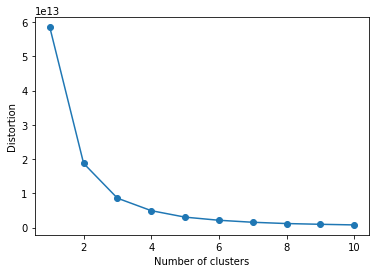

In [48]:
kmeans_cluster(incomedf)

[[ 54.7656623]]
[[ 66.63387349]
 [ 38.6062682 ]]
[[ 75.4717047 ]
 [ 55.11660016]
 [ 32.06880521]]
[[ 28.13615385]
 [ 79.35245143]
 [ 61.93709091]
 [ 47.20393498]]
[[ 83.16859122]
 [ 42.83665073]
 [ 55.54870934]
 [ 26.31154829]
 [ 67.68965517]]
[[ 50.52371569]
 [ 71.65098186]
 [ 38.60368901]
 [ 24.70621041]
 [ 60.71978819]
 [ 85.3350642 ]]
[[ 56.93983201]
 [ 36.14323095]
 [ 87.52031979]
 [ 65.75299973]
 [ 47.62216796]
 [ 75.31850487]
 [ 23.79639525]]
[[ 51.66392627]
 [ 76.32923468]
 [ 23.79639525]
 [ 66.70529817]
 [ 43.14028577]
 [ 34.38724869]
 [ 58.89755179]
 [ 88.26303855]]
[[ 49.89534494]
 [ 80.52490689]
 [ 22.3378961 ]
 [ 64.37169838]
 [ 40.7289952 ]
 [ 57.02466255]
 [ 72.12954254]
 [ 90.50342309]
 [ 31.01997132]]
[[ 52.57749077]
 [ 29.38951567]
 [ 72.12954254]
 [ 90.50342309]
 [ 64.86573234]
 [ 38.35642695]
 [ 46.30096286]
 [ 80.52490689]
 [ 21.74702716]
 [ 58.42878821]]


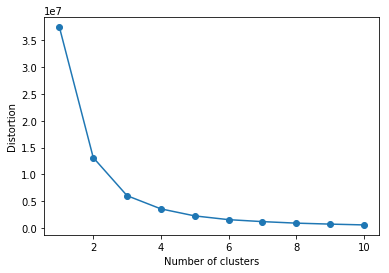

In [49]:
kmeans_cluster(agedf)

[[ 1056.44797254]]
[[  801.00249187]
 [ 1526.64615906]]
[[ 1342.08088874]
 [  767.91539615]
 [ 2010.41821059]]
[[  731.76981607]
 [ 1464.82769542]
 [ 1099.91098681]
 [ 2052.89324109]]
[[  846.5200136 ]
 [ 1495.99334704]
 [ 2068.77304406]
 [  639.91996145]
 [ 1173.01237678]]
[[  818.81575836]
 [ 1573.44080988]
 [ 1326.39868421]
 [  626.88513142]
 [ 2093.47091379]
 [ 1071.66946102]]
[[ 1829.37591947]
 [  815.3668897 ]
 [ 1512.50676708]
 [  625.98492216]
 [ 2170.76970661]
 [ 1285.05483951]
 [ 1049.81587742]]
[[  598.8043585 ]
 [ 1315.85260607]
 [ 2175.592761  ]
 [  879.97059626]
 [ 1094.61292291]
 [ 1846.49353274]
 [  748.79419641]
 [ 1529.9694764 ]]
[[ 1037.97858572]
 [ 1870.10164893]
 [  738.92112384]
 [ 1390.45132453]
 [  859.46892043]
 [  595.87939208]
 [ 1218.24820747]
 [ 1563.46803917]
 [ 2184.28099808]]
[[ 1571.83094099]
 [  728.10958465]
 [ 2184.28099808]
 [ 1119.74107219]
 [ 1265.58572223]
 [  841.1862699 ]
 [ 1413.00185474]
 [  591.69279755]
 [ 1872.30220246]
 [  977.87740385]]


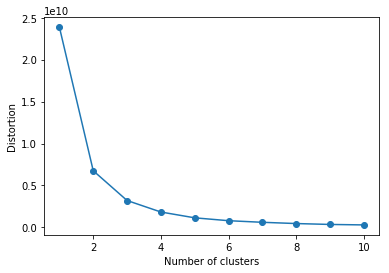

In [50]:
kmeans_cluster(daysdf)

It looks like 2 or 3 clusters are our best options for days as member,  age and income based on the elbow method.  We ran this analysis on the understanding dataset and we will  apply our categorical decisions and boundaries on both understanding and test ("unseen data"). Rather than fitting our data directly, we'll create some visuals of the data and its frequency. We'll then see how many groups appear to make sense for our categorization of numeric data. We now have two options. If we're satisfied with 3 groups, we can directly categorize using the cut function and let the machine handle the specific boundaries. Alternatively, we can set the boundaries ourselves for each group to ensure the exact same evaluation metric is applied to our test and understanding datasets. It helps to know what we are interested in during analyses. Do we care if someone falls within a specific dollar income, age, or duration of membership bucket, or are we more concerned with their relative position in comparison to their peers in low, middle, and high categories. For example, what happens if our test data only shows  people whose income provided is over $80000. If we do a hard encoding, they'll be placed in an upper income bin. Conversely, if we use relative position, they may fall into lower or middle income. We are assuming here that the data from the understanding set is robust and representative of our target demographics so we can opt to use relative bins. This may also help us down the road if everyone's incomes or age distribution or days start to change and therefore we are still able to group them without going through the manual work of changing our bins. Let's use relative in this instance. 

We'll then create dummies from these categories and since every missing instance in age, income, and gender are equivalent we'll drop the NA columns. This will also to handle the instance when user has not provided us this information (using the dummy k-1 approach).

(<matplotlib.axes._subplots.AxesSubplot at 0x7f3d24d29dd8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3d24bd5c88>)

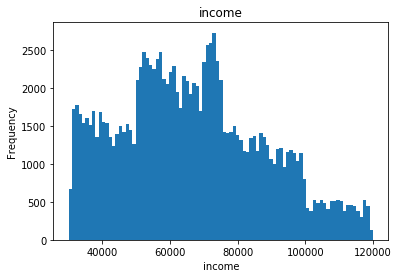

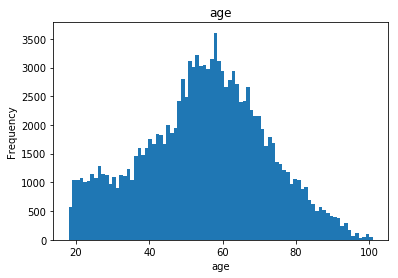

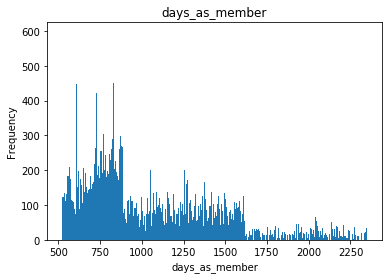

In [51]:
visual(understanding_df, 'income','age', 'days_as_member')

In [52]:
#Taking our centroids from before, let's calculate linear "boundaries" based on equal euclidian distance measures
#if we decide to go by distance, which we wont, but.... ya never know
def calc_ends_3(col, c1, c2, c3):
    d1 = (c2-c1)/2
    d2 = (c3-c2)/2
    
    p0 = col.min()
    p1 = d1 + c1
    p2 = d2 + c2
    p3 = col.max()

    print(" Your first bucket boundaries are: [" + p0 + " , " + p1 + "]" )
    print(" Your second bucket boundaries are: [" + p1 + " , " + p2 + "]" )
    print(" Your third bucket boundaries are: [" + p2 + " , " + p3 + "]" )

In [53]:
#Let's also look at our reward, duration, and difficulty features
rewarddf = understanding_df['reward'].dropna().values.reshape(-1,1)
durationdf = understanding_df['duration'].dropna().values.reshape(-1,1)
difficultydf = understanding_df['difficulty'].dropna().values.reshape(-1,1)

[[ 4.42415967]]
[[  2.87915329]
 [ 10.        ]]
[[  1.61193068]
 [ 10.        ]
 [  5.        ]]
[[  2.36057218e+00]
 [  1.00000000e+01]
 [  5.00000000e+00]
 [ -2.24176233e-12]]
[[  2.00000000e+00]
 [  1.00000000e+01]
 [  5.00000000e+00]
 [ -2.24176233e-12]
 [  3.00000000e+00]]
[[  2.00000000e+00]
 [  1.00000000e+01]
 [  5.00000000e+00]
 [ -2.24176233e-12]
 [  3.00000000e+00]
 [  5.00000000e+00]]
[[  2.00000000e+00]
 [  1.00000000e+01]
 [  5.00000000e+00]
 [ -2.24176233e-12]
 [  3.00000000e+00]
 [  5.00000000e+00]
 [  3.00000000e+00]]
[[  2.00000000e+00]
 [  1.00000000e+01]
 [  5.00000000e+00]
 [ -2.24176233e-12]
 [  3.00000000e+00]
 [  5.00000000e+00]
 [  3.00000000e+00]
 [  3.00000000e+00]]
[[  2.00000000e+00]
 [  1.00000000e+01]
 [  5.00000000e+00]
 [ -2.24176233e-12]
 [  3.00000000e+00]
 [  5.00000000e+00]
 [  3.00000000e+00]
 [  3.00000000e+00]
 [  3.00000000e+00]]
[[  2.00000000e+00]
 [  5.00000000e+00]
 [  3.00000000e+00]
 [ -2.24176233e-12]
 [  5.00000000e+00]
 [  3.00000000e+

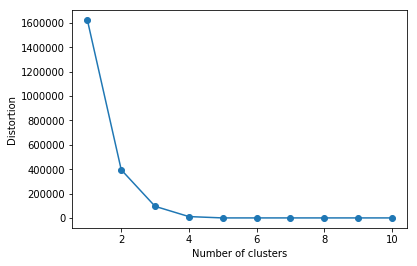

In [54]:
kmeans_cluster(rewarddf)

[[ 158.62553705]]
[[ 191.40959176]
 [ 104.71820004]]
[[ 168.        ]
 [ 104.71820004]
 [ 240.        ]]
[[ 168.        ]
 [  82.82346566]
 [ 240.        ]
 [ 120.        ]]
[[ 168.]
 [  72.]
 [ 240.]
 [ 120.]
 [  96.]]
[[ 168.]
 [  72.]
 [ 240.]
 [ 120.]
 [  96.]
 [ 168.]]
[[ 168.]
 [  72.]
 [ 240.]
 [ 120.]
 [  96.]
 [ 168.]
 [ 168.]]
[[ 168.]
 [  96.]
 [ 240.]
 [ 120.]
 [  72.]
 [ 168.]
 [ 168.]
 [ 168.]]
[[ 168.]
 [  96.]
 [ 240.]
 [ 120.]
 [  72.]
 [ 168.]
 [ 168.]
 [ 168.]
 [ 168.]]
[[ 168.]
 [ 240.]
 [ 168.]
 [  72.]
 [  96.]
 [ 168.]
 [ 168.]
 [ 168.]
 [ 120.]
 [ 120.]]


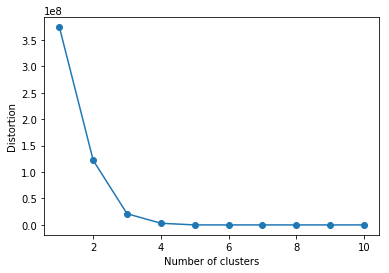

In [55]:
kmeans_cluster(durationdf)

[[ 7.84839656]]
[[  3.89975208]
 [ 11.59773356]]
[[  9.34371302]
 [  2.87849464]
 [ 20.        ]]
[[  1.00000000e+01]
 [  2.81286106e-12]
 [  2.00000000e+01]
 [  5.72789245e+00]]
[[  1.00000000e+01]
 [  2.81286106e-12]
 [  2.00000000e+01]
 [  5.00000000e+00]
 [  7.00000000e+00]]
[[  1.00000000e+01]
 [  2.81286106e-12]
 [  2.00000000e+01]
 [  5.00000000e+00]
 [  7.00000000e+00]
 [  5.00000000e+00]]
[[  1.00000000e+01]
 [  2.81286106e-12]
 [  2.00000000e+01]
 [  5.00000000e+00]
 [  7.00000000e+00]
 [  5.00000000e+00]
 [  7.00000000e+00]]
[[  1.00000000e+01]
 [  2.81286106e-12]
 [  2.00000000e+01]
 [  5.00000000e+00]
 [  7.00000000e+00]
 [  5.00000000e+00]
 [  7.00000000e+00]
 [  7.00000000e+00]]
[[  1.00000000e+01]
 [  2.81286106e-12]
 [  2.00000000e+01]
 [  5.00000000e+00]
 [  7.00000000e+00]
 [  5.00000000e+00]
 [  7.00000000e+00]
 [  7.00000000e+00]
 [  7.00000000e+00]]
[[  5.00000000e+00]
 [  2.81286106e-12]
 [  2.00000000e+01]
 [  5.00000000e+00]
 [  7.00000000e+00]
 [  7.00000000e+

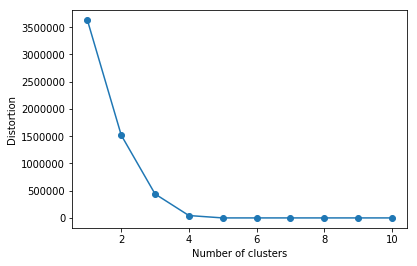

In [56]:
kmeans_cluster(difficultydf)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f3d178c3d30>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3d17849c18>)

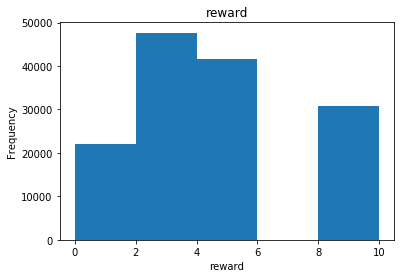

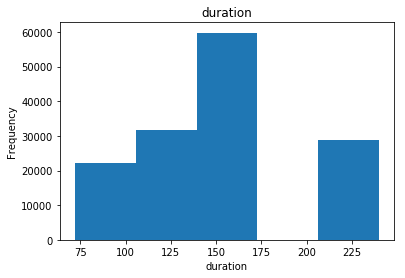

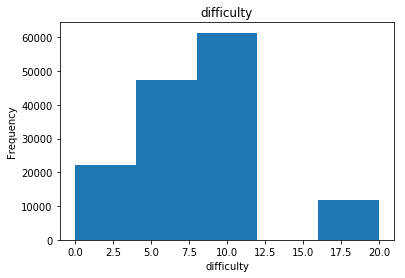

In [57]:
visual(understanding_df, 'reward','duration', 'difficulty')

Our kmeans using the elbow method favors 2 clusters for reward . When faced with duration, our kmeans model favors 2 clusters. For difficulty, it favors 3 centroids. We'll consider this when categorizing variables and creating dummies to avoid having too many features.

In [258]:
#let's get the df ready to run a model on
"""
input: understanding_df or test_df
output: df


"""
def readyformodel(some_df):
    
    df = some_df.copy()
    

    #let's convert our days_as_member, income, and age vars into categorical ones
    df['days_as_member'] = pd.cut(df.days_as_member, 2, labels=["newer", "longer"])
    df['income'] = pd.cut(df.income, 2, labels=["lower", "higher"])
    df['age'] = pd.cut(df.age, 2, labels=["younger", "older"])
    
    #we'll do the same with duration, difficulty, and rewar for offer
    df['duration'] = pd.cut(df.duration, 3, labels=["shorter", "medium", "longer"])
    df['difficulty'] = pd.cut(df.difficulty, 3, labels=["easier", "medium", "harder"])
    df['reward'] = pd.cut(df.reward, 2, labels=["smaller", "larger"])
    
    
    #let's make dummies from our data
    df_new = pd.get_dummies(df, columns =['gender', 'days_as_member', 'income', 'age', \
                                            'reward', 'difficulty', 'duration'])
    
    #as promised, we're going to get rid of informational offers
    df_new = df_new[df_new['informational']==0]                                                     
    
    #let's drop some columns
    #offer_received is no longer important as it is true everywhere
    #drop offerid as we will use the descriptive features of each offer(assuming no compelling features hidden)

    
    df_new.drop(['personid', 'offer received', 'offer viewed', 'offerid',  \
              'gender_O', 'email','informational',  \
                 'bogo', 'duration_shorter','difficulty_easier', \
                'age_younger', 'days_as_member_newer', 'income_lower', 'reward_smaller'], axis=1, inplace=True)
    
    return df_new

In [259]:
understandingdf = readyformodel(understanding_df)
testdf = readyformodel(test_df)

In [260]:
understandingdf

,offer completed,mobile,social,web,discount,gender_F,gender_M,days_as_member_longer,income_higher,age_older,reward_larger,difficulty_medium,difficulty_harder,duration_medium,duration_longer
53952,0,1,0,1,1,0,1,1,1,1,0,1,0,1,0
134617,1,1,0,1,0,1,0,0,1,0,0,0,0,1,0
14281,0,1,1,1,1,0,1,0,0,1,0,1,0,0,1
42484,1,0,0,1,1,0,1,1,0,0,0,0,1,0,1
10833,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
64108,0,1,1,1,1,0,1,0,0,0,0,1,0,0,1
108979,0,1,0,1,1,0,1,0,0,0,0,1,0,1,0
123048,0,1,1,1,1,1,0,0,0,0,0,1,0,1,0
109131,0,1,1,0,0,1,0,0,1,1,1,1,0,1,0
48355,0,0,0,1,1,1,0,0,1,1,0,0,1,0,1


In [261]:
#this space will just be used to check and update our function above
understandingdf.columns.values

array(['offer completed', 'mobile', 'social', 'web', 'discount',
       'gender_F', 'gender_M', 'days_as_member_longer', 'income_higher',
       'age_older', 'reward_larger', 'difficulty_medium',
       'difficulty_harder', 'duration_medium', 'duration_longer'], dtype=object)

We dropped variables which were explained by the absence/precense of another after encoding for dummies.

In [262]:
testdf

,offer completed,mobile,social,web,discount,gender_F,gender_M,days_as_member_longer,income_higher,age_older,reward_larger,difficulty_medium,difficulty_harder,duration_medium,duration_longer
0,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0
3,0,1,1,1,1,0,0,0,0,0,0,1,0,0,1
4,0,1,1,1,0,0,0,0,0,0,1,1,0,0,0
25,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0
41,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0
45,0,1,1,1,1,0,1,0,1,1,0,1,0,1,0
47,0,1,1,1,1,1,0,0,0,0,0,1,0,1,0
58,0,1,1,1,0,0,1,1,0,1,1,1,0,0,0
59,0,1,1,1,1,1,0,0,0,0,0,1,0,0,1
71,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0


Great, now that we are done preprocessing, we'll keep the testdf to the side for now and split understanding up into train and validation data sets using sklearn. We're also going to check for feature importance in our training data using randomforests. 

In [263]:
#let's first take our predicted feature out of the dataframes
X_understanding = understandingdf.drop('offer completed', axis=1)
y_understanding = understandingdf['offer completed']
#we'll need this later;
X_test = testdf.drop('offer completed', axis=1)
y_test = testdf['offer completed']

In [264]:
from sklearn.model_selection import train_test_split
#using 20% of the data for validation
#we used a random state for our last split 
X_train, X_val, y_train, y_val = train_test_split(X_understanding, y_understanding, test_size=0.2, random_state=123)

In [265]:
#randomforest time!
from sklearn.ensemble import RandomForestClassifier

feat_labels = understandingdf.columns[1:] #get the first row
forest = RandomForestClassifier(n_estimators=1000, random_state=123, n_jobs=-1, verbose=3)
forest.fit(X_train, y_train)

importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

for feature in (zip(feat_labels, importances)):
    print(feature)


building tree 1 of 1000
building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building tree 41 of 1000
building tree 42 of 1000
building tree 43 of 1000
building tree 44 of 1000
building tree 45 of 1000
buil

building tree 326 of 1000
building tree 327 of 1000
building tree 328 of 1000
building tree 329 of 1000
building tree 330 of 1000
building tree 331 of 1000
building tree 332 of 1000
building tree 333 of 1000
building tree 334 of 1000
building tree 335 of 1000
building tree 336 of 1000
building tree 337 of 1000
building tree 338 of 1000
building tree 339 of 1000
building tree 340 of 1000
building tree 341 of 1000
building tree 342 of 1000
building tree 343 of 1000
building tree 344 of 1000
building tree 345 of 1000
building tree 346 of 1000
building tree 347 of 1000
building tree 348 of 1000
building tree 349 of 1000
building tree 350 of 1000
building tree 351 of 1000
building tree 352 of 1000
building tree 353 of 1000
building tree 354 of 1000
building tree 355 of 1000
building tree 356 of 1000
building tree 357 of 1000
building tree 358 of 1000
building tree 359 of 1000
building tree 360 of 1000
building tree 361 of 1000
building tree 362 of 1000
building tree 363 of 1000
building tre

building tree 643 of 1000
building tree 644 of 1000
building tree 645 of 1000
building tree 646 of 1000
building tree 647 of 1000
building tree 648 of 1000
building tree 649 of 1000
building tree 650 of 1000
building tree 651 of 1000
building tree 652 of 1000
building tree 653 of 1000
building tree 654 of 1000
building tree 655 of 1000
building tree 656 of 1000
building tree 657 of 1000
building tree 658 of 1000
building tree 659 of 1000
building tree 660 of 1000
building tree 661 of 1000
building tree 662 of 1000
building tree 663 of 1000
building tree 664 of 1000
building tree 665 of 1000
building tree 666 of 1000
building tree 667 of 1000
building tree 668 of 1000
building tree 669 of 1000
building tree 670 of 1000
building tree 671 of 1000
building tree 672 of 1000
building tree 673 of 1000
building tree 674 of 1000
building tree 675 of 1000
building tree 676 of 1000
building tree 677 of 1000
building tree 678 of 1000
building tree 679 of 1000
building tree 680 of 1000
building tre

building tree 960 of 1000
building tree 961 of 1000
building tree 962 of 1000
building tree 963 of 1000
building tree 964 of 1000
building tree 965 of 1000
building tree 966 of 1000
building tree 967 of 1000
building tree 968 of 1000
building tree 969 of 1000
building tree 970 of 1000
building tree 971 of 1000
building tree 972 of 1000
building tree 973 of 1000
building tree 974 of 1000
building tree 975 of 1000
building tree 976 of 1000
building tree 977 of 1000
building tree 978 of 1000
building tree 979 of 1000
building tree 980 of 1000
building tree 981 of 1000
building tree 982 of 1000
building tree 983 of 1000
building tree 984 of 1000
building tree 985 of 1000
building tree 986 of 1000
building tree 987 of 1000
building tree 988 of 1000
building tree 989 of 1000
building tree 990 of 1000
building tree 991 of 1000
building tree 992 of 1000
building tree 993 of 1000
building tree 994 of 1000
building tree 995 of 1000
building tree 996 of 1000
building tree 997 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   45.8s finished


In [266]:
varImp = pd.DataFrame(list(zip(feat_labels, importances)), \
                        columns=['feat_label', 'importance']).sort_values(by='importance', ascending=False).reset_index(drop=True)

varImp

,feat_label,importance
0,gender_F,0.264263
1,income_higher,0.219222
2,gender_M,0.212214
3,reward_larger,0.067389
4,age_older,0.062167
5,days_as_member_longer,0.052721
6,discount,0.031082
7,social,0.027712
8,difficulty_medium,0.018172
9,duration_medium,0.016181


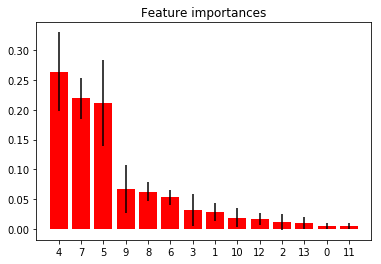

In [267]:
#making a plot
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)  

plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

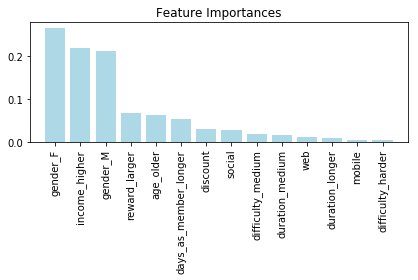

In [268]:
#another plot
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices],color='lightblue',align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

Well this is certainly interesting. It looks like gender, and income are by far the most important predictors of whether someone will complete an offer.

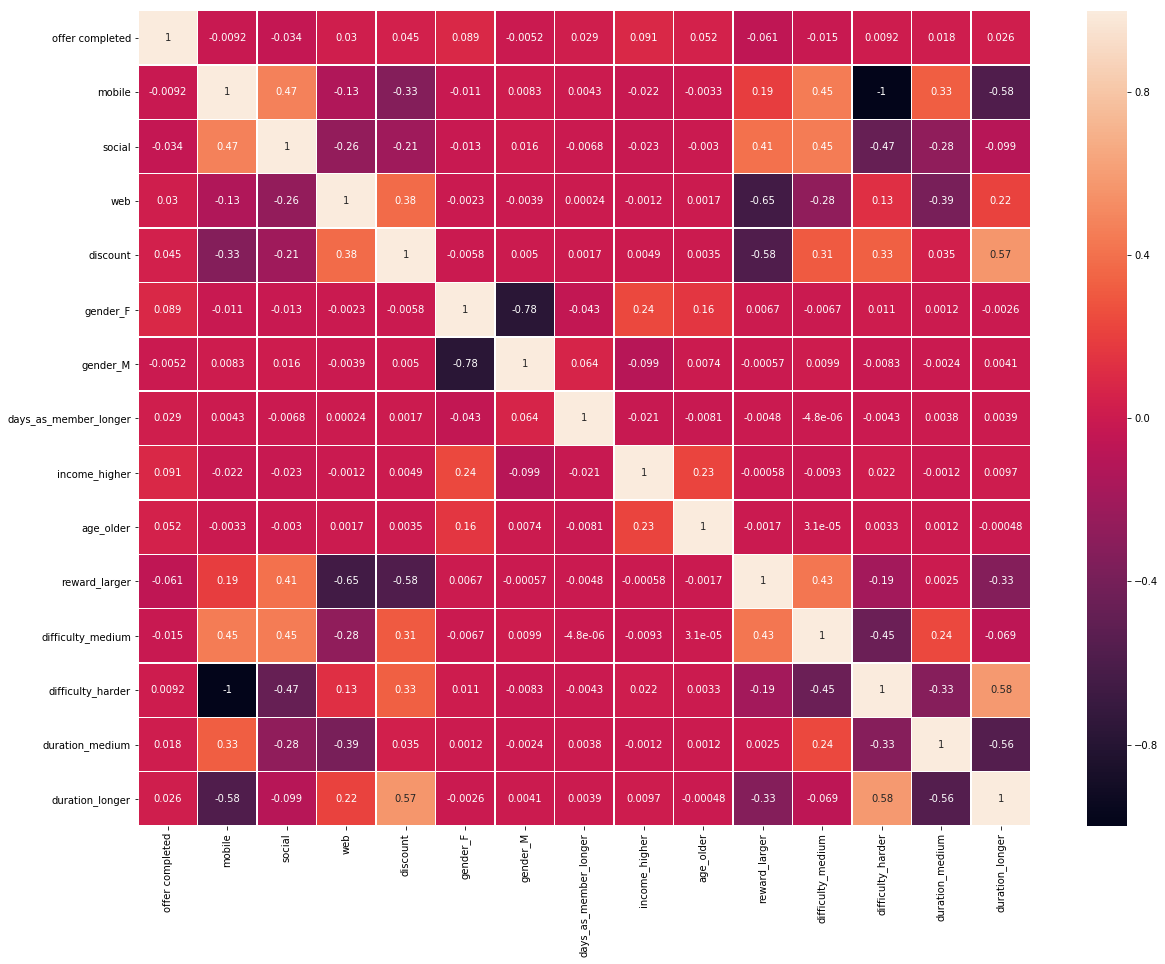

In [269]:
import seaborn as sns

plt.subplots(figsize=(20, 15))
corr = understandingdf.corr()
ax = sns.heatmap(corr, annot=True, linewidths=.5)

In [270]:
#We're going to run multiple models and compare. We'll choose from these which to use on the test data.
#We'll run each of these models on different feature sets
"""
Input: X_train, y_train, X_val, y_val, varImp, num_features

Output: modified data set modX_train

"""
def modX(X_train, num_features, varImp):
    #return the train df with only the number of features specified, ranked by importance
    feat_list = []
    #loop through our varImp df
    for i in range(num_features):
        feat_list.append(varImp.feat_label[i])
    
    #create the new modX_train dataframe for training
    modX_train = X_train[feat_list]                      
    
    return modX_train





In [271]:
#check to see if our modX function is working. which it is.
#we'll call this function to create training sets as needed
modX_train = modX(X_train, 5, varImp)
modX_train

,gender_F,income_higher,gender_M,reward_larger,age_older
69613,0,0,1,0,0
133636,0,0,1,0,0
98268,0,0,0,1,0
77021,0,0,1,0,0
86188,0,0,0,0,0
167457,1,0,0,0,1
46705,1,0,0,0,0
126354,0,1,1,0,1
158693,1,0,0,0,1
25328,1,0,0,0,0


Based of off drops in variable importance from the charts our randomforest generated, I'd like to run algorithms with different number of features to test. We'll do this by editing the train dataset passed to the algorithm using our modX function.

In [272]:
#import them all, mwuah hahahaha
from sklearn.metrics import accuracy_score, log_loss, cohen_kappa_score, f1_score
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [275]:
#get our numbers ready
#let's also decide which models to run
#let's compare 5 algorithms and pick one for the test data
num_feats = [1, 3, 6, 8, 10, 12, 14]
classifiers = [KNeighborsClassifier(n_neighbors = 3), 
               LogisticRegression(class_weight="balanced"),
               GaussianNB(),
               DecisionTreeClassifier(class_weight="balanced"),
               RandomForestClassifier(n_estimators=300, n_jobs= -1,max_features='sqrt', \
                                      random_state=123, class_weight="balanced")]

In [276]:
# oh boy, we're running them

for clf in classifiers:
    for feats in num_feats:
        #get our train and val sets ready with right number of vars
        modX_train = modX(X_train, feats, varImp)
        modX_val = modX(X_val, feats, varImp)
        #fit the model
        clf.fit(modX_train, y_train)
        name = clf.__class__.__name__
        
        #predict on validation data
        train_preds = clf.predict(modX_val)
        #calculate our relevent stats
        acc = accuracy_score(y_val, train_preds)
        logloss = log_loss(y_val, train_preds)
        f1stat = f1_score(y_val, train_preds)
        kappa = cohen_kappa_score(y_val, train_preds)

        print(str(name) + " " + str(feats) + " accuracy: " + str(round(acc, 3)) + " logloss: " + \
              str(round(logloss, 3)) + " f1: " + str(round(f1stat,3)) + " kappa: " + str(round(kappa,3)))
        

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


KNeighborsClassifier 1 accuracy: 0.759 logloss: 8.307 f1: 0.0 kappa: 0.0
KNeighborsClassifier 3 accuracy: 0.438 logloss: 19.414 f1: 0.37 kappa: 0.028
KNeighborsClassifier 6 accuracy: 0.715 logloss: 9.84 f1: 0.17 kappa: 0.03
KNeighborsClassifier 8 accuracy: 0.725 logloss: 9.511 f1: 0.14 kappa: 0.023
KNeighborsClassifier 10 accuracy: 0.696 logloss: 10.485 f1: 0.196 kappa: 0.026
KNeighborsClassifier 12 accuracy: 0.696 logloss: 10.485 f1: 0.196 kappa: 0.026
KNeighborsClassifier 14 accuracy: 0.696 logloss: 10.485 f1: 0.196 kappa: 0.026
LogisticRegression 1 accuracy: 0.599 logloss: 13.855 f1: 0.359 kappa: 0.089
LogisticRegression 3 accuracy: 0.551 logloss: 15.523 f1: 0.394 kappa: 0.102
LogisticRegression 6 accuracy: 0.565 logloss: 15.022 f1: 0.395 kappa: 0.11
LogisticRegression 8 accuracy: 0.556 logloss: 15.324 f1: 0.397 kappa: 0.108
LogisticRegression 10 accuracy: 0.519 logloss: 16.612 f1: 0.402 kappa: 0.098
LogisticRegression 12 accuracy: 0.516 logloss: 16.712 f1: 0.406 kappa: 0.101
Logist

During our initial run, it looked like our Logistics regression and svc models with the highest accuracy were simply predicting 0 for every shot. We've replaced svc (as it was taking too long to run) and also used class_Weight=balanced to handle class imbalance. It looks like some of our models have improved. While accuracy has (understandably) dropped, our kappa stats are consistently near or above 0.1 and f1 score above 0.4 for our tree and forest classifers. The most interesting part of this test run is the curse of dimensionality. Running our models on just 1 predictor features with our trees and forest provided the greatest accuracy, though not the greatest kappa or f1 values. The kappa stat is a useful tool for seeing if our model is better than a random guess. Our low kappa scores indicate the models aren't too informative even with some adjustments. The best performing classifiers we chose were logistic regression, decision tree, and random forest. For our test data set, I'm going to stick with a RandomForest Classifier with 6 most important features (importance>0.05). I'll run it on the test data and we can compare it to our heuristic from before. We'll discuss in the report ways in which we can improve our model performance within preprocessing, feature selection, sampling, and tuning.

In [291]:
from sklearn import metrics
#running our algorithm on test data
modX_train = modX(X_train, 6, varImp)
modX_test = modX(X_test, 6, varImp)

clf = RandomForestClassifier(n_estimators=300, n_jobs= -1, random_state=123,\
                                       max_features='sqrt', class_weight="balanced")
#fit the model
clf.fit(modX_train, y_train)
#predict
y_pred = clf.predict(modX_test)

#print accuracy of balanced
print(metrics.accuracy_score(y_test, y_pred))


0.539266522108


In [292]:
#confusion matrix

print(metrics.confusion_matrix(y_test, y_pred))

[[8139 7939]
 [1835 3301]]


In [289]:
clf = RandomForestClassifier(n_estimators=300, n_jobs= -1, random_state=123,\
                                       max_features='sqrt')
#fit the model
clf.fit(modX_train, y_train)
#predict
y_pred = clf.predict(modX_test)

#print accuracy (not balanced)
print(metrics.accuracy_score(y_test, y_pred))

0.757801451871


In [290]:
#confusion matrix

print(metrics.confusion_matrix(y_test, y_pred))

[[16076     2]
 [ 5136     0]]


In [295]:
print(metrics.cohen_kappa_score(y_test, y_pred))

0.106049885044


In [294]:
y_test.describe()

count    21214.000000
mean         0.242104
std          0.428367
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: offer completed, dtype: float64

From our confusion matrix, it looks like we misclassified a lot of completed offers as incomplete. Our balanced model did classify a lot fewer completed offers as incomplete, however it also misclassified a lot of events where an offer was not completed as complete (false positives). Let's compare this with our belief about our customers behavior from before: 23.64% of all (non-informational) offers are expected to be completed. In the new data, 24.21% of all people who received an offer completed it. Our un-weighted model believed 2 people who received an offer would complete it. Out weighted model which corrected for class imbalance predicted that roughly 52.99% of applicants who received an offer would complete it. Our kappa stat is a 0.106, which indicates the model's accuracy isn't really too much better than guessing. In the paper, I'll discuss other steps we can take next time to make the model more robust and try to more accurately predict whether someone will complete an offer given that they've received one. 